<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [39]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats 
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'app_wau.csv',
 'mall_customers.csv',
 'match_result_test.csv',
 'scanner_data.csv',
 'ecommerce-data.csv',
 'sample-sales-data.csv',
 '1_order_payments_dataset.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'online_retail.xlsx',
 'ab_experiment.csv',
 'bz_data_analyis.csv',
 'cookie_cats.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales.csv',
 'lead_conversion.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'groceries.csv',
 '1_orders_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 'sales_data_with_stores.csv',
 'sales_vs_discount.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample_data']

In [4]:
df = pd.read_csv('app_wau.csv')
df['occurred_at'] = df['occurred_at'].to_numpy().astype('datetime64[ns]')
df['date'] = df['occurred_at'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      340832 non-null  float64       
 1   occurred_at  340832 non-null  datetime64[ns]
 2   event_type   340832 non-null  object        
 3   event_name   340832 non-null  object        
 4   location     340832 non-null  object        
 5   device       340832 non-null  object        
 6   user_type    325255 non-null  float64       
 7   date         340832 non-null  datetime64[ns]
 8   week         340832 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(4)
memory usage: 23.4+ MB


In [12]:
cnt_device = df['device'].value_counts().reset_index(name = 'cnt').sort_values('index')
cnt_device.head()

,index,cnt
18,acer aspire desktop,5402
12,acer aspire notebook,9372
24,amazon fire phone,2298
10,asus chromebook,10014
8,dell inspiron desktop,10569


In [14]:
cnt_device['index'].to_list()

['acer aspire desktop',
 'acer aspire notebook',
 'amazon fire phone',
 'asus chromebook',
 'dell inspiron desktop',
 'dell inspiron notebook',
 'hp pavilion desktop',
 'htc one',
 'ipad air',
 'ipad mini',
 'iphone 4s',
 'iphone 5',
 'iphone 5s',
 'kindle fire',
 'lenovo thinkpad',
 'mac mini',
 'macbook air',
 'macbook pro',
 'nexus 10',
 'nexus 5',
 'nexus 7',
 'nokia lumia 635',
 'samsumg galaxy tablet',
 'samsung galaxy note',
 'samsung galaxy s4',
 'windows surface']

In [15]:
list_maker = {'acer aspire desktop':'acer',
 'acer aspire notebook':'acer',
 'amazon fire phone':'amazon',
 'asus chromebook':'asus',
 'dell inspiron desktop':'dell',
 'dell inspiron notebook':'dell',
 'hp pavilion desktop':'hp',
 'htc one':'htc',
 'ipad air':'apple',
 'ipad mini':'apple',
 'iphone 4s':'apple',
 'iphone 5':'apple',
 'iphone 5s':'apple',
 'kindle fire':'amazon',
 'lenovo thinkpad':'lenovo',
 'mac mini':'apple',
 'macbook air':'apple',
 'macbook pro':'apple',
 'nexus 10':'google',
 'nexus 5':'google',
 'nexus 7':'google',
 'nokia lumia 635':'nokia',
 'samsumg galaxy tablet':'samsung',
 'samsung galaxy note':'samsung',
 'samsung galaxy s4':'samsung',
 'windows surface':'ms'}

In [16]:
list_os = {'acer aspire desktop':'win',
 'acer aspire notebook':'win',
 'amazon fire phone':'aos',
 'asus chromebook':'chrome',
 'dell inspiron desktop':'win',
 'dell inspiron notebook':'win',
 'hp pavilion desktop':'win',
 'htc one':'aos',
 'ipad air':'ios',
 'ipad mini':'ios',
 'iphone 4s':'ios',
 'iphone 5':'ios',
 'iphone 5s':'ios',
 'kindle fire':'aos',
 'lenovo thinkpad':'aos',
 'mac mini':'ios',
 'macbook air':'ios',
 'macbook pro':'ios',
 'nexus 10':'aos',
 'nexus 5':'aos',
 'nexus 7':'aos',
 'nokia lumia 635':'aos',
 'samsumg galaxy tablet':'aos',
 'samsung galaxy note':'aos',
 'samsung galaxy s4':'aos',
 'windows surface':'win'}

In [19]:
df = df.assign(os = df['device'].apply(lambda x : list_os.get(x,x)),
          maker = df['device'].apply(lambda x : list_maker.get(x,x))
          )
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,os,maker
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell


In [23]:
df[['event_type','event_name']].value_counts().reset_index(name = 'cnt').sort_values('event_type')

,event_type,event_name,cnt
0,engagement,home_page,94065
18,engagement,search_click_result_7,709
17,engagement,search_click_result_9,784
16,engagement,search_click_result_6,805
15,engagement,search_click_result_5,968
14,engagement,search_click_result_3,1134
13,engagement,search_click_result_4,1264
12,engagement,search_click_result_1,1413
11,engagement,search_click_result_2,1499
19,engagement,search_click_result_8,690


In [34]:
cnt_user = df[df['event_name'] == 'login'][['user_id','location']].drop_duplicates().groupby(['location'])['user_id'].count().reset_index(name = 'user').sort_values(['user'], ascending = False)
cnt_user['ratio'] = cnt_user[['user']].apply(lambda x : round(x/sum(x)*100,2))
cnt_user.head()

,location,user,ratio
45,United States,1741,28.35
22,Japan,462,7.52
12,Germany,375,6.11
11,France,289,4.71
44,United Kingdom,289,4.71


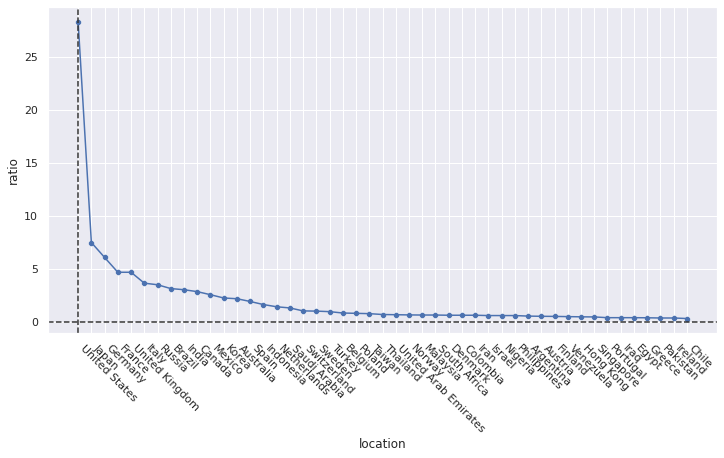

In [52]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.lineplot(data = cnt_user, x = 'location', y = 'ratio')
sns.scatterplot(data = cnt_user, x = 'location', y = 'ratio')
plt.axvline(x = 0, color = '#333333', linestyle = '--')
plt.axhline(y = 0, color = '#333333', linestyle = '--')
plt.xticks(rotation = -45, ha = 'left')
plt.show()

In [53]:
cnt_wau = df[df['event_name'] == 'login'][['user_id','week','location']].drop_duplicates().groupby(['week','location'])['user_id'].count().reset_index(name = 'cnt')
cnt_wau.head()

,week,location,cnt
0,2014-04-28,Argentina,1
1,2014-04-28,Australia,17
2,2014-04-28,Austria,3
3,2014-04-28,Belgium,8
4,2014-04-28,Brazil,28


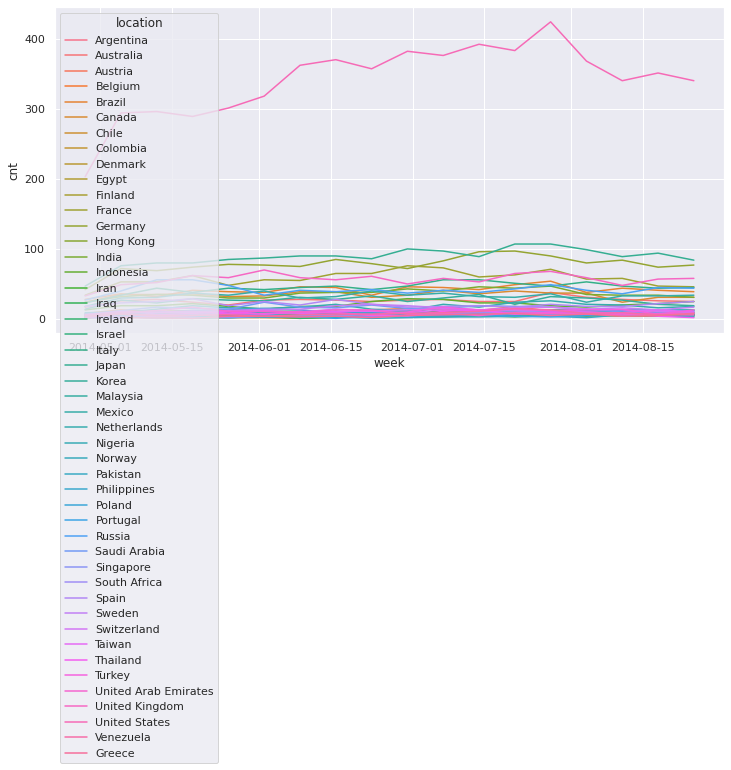

In [55]:
sns.lineplot(data = cnt_wau, x = 'week', y = 'cnt', hue = 'location')
plt.show()

In [60]:
df2 = df[df['location'].isin(cnt_user.head(5)['location'])]
df2.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,os,maker
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell


In [61]:
cnt_wau2 = df2[df2['event_name'] == 'login'][['user_id','week','location']].drop_duplicates().groupby(['week','location'])['user_id'].count().reset_index(name = 'cnt')
cnt_wau2.head()

,week,location,cnt
0,2014-04-28,France,34
1,2014-04-28,Germany,42
2,2014-04-28,Japan,47
3,2014-04-28,United Kingdom,33
4,2014-04-28,United States,203


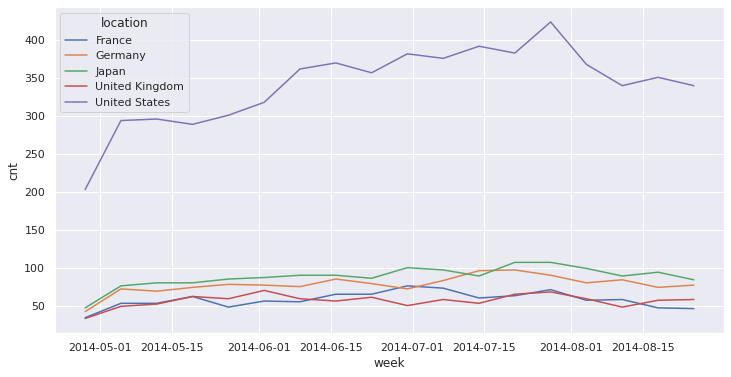

In [62]:
sns.lineplot(data = cnt_wau2, x = 'week', y = 'cnt', hue = 'location')
plt.show()

In [73]:
df_us_jp = df[df['location'].isin(['United States', 'Japan'])]
df_us_jp.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,os,maker
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,win,dell


In [74]:
cnt_wau_us_jp = df_us_jp[df_us_jp['event_name'] == 'login'][['user_id','location','week', 'maker']].drop_duplicates().groupby(['week','location','maker'])['user_id'].count().reset_index(name = 'wau')
cnt_wau_us_jp.head()

,week,location,maker,wau
0,2014-04-28,Japan,amazon,1
1,2014-04-28,Japan,apple,27
2,2014-04-28,Japan,asus,3
3,2014-04-28,Japan,dell,4
4,2014-04-28,Japan,google,7


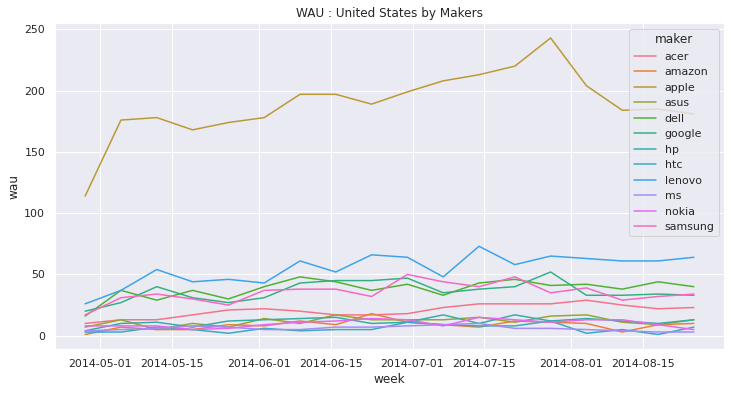

In [75]:
sns.lineplot(data = cnt_wau_us_jp[cnt_wau_us_jp['location'] == 'United States'], x = 'week', y = 'wau', hue = 'maker')
plt.title('WAU : United States by Makers')
plt.show()

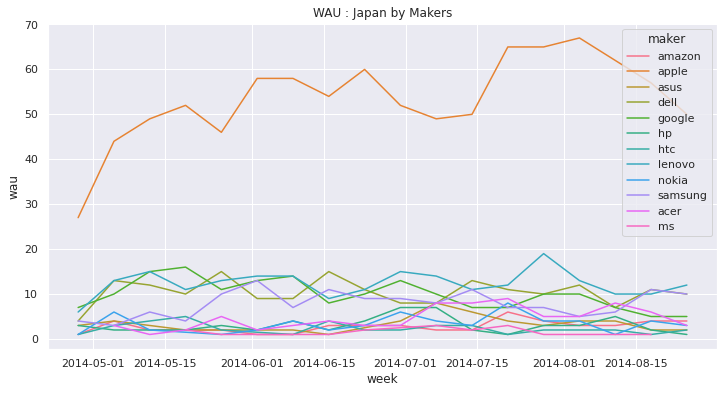

In [76]:
sns.lineplot(data = cnt_wau_us_jp[cnt_wau_us_jp['location'] == 'Japan'], x = 'week', y = 'wau', hue = 'maker')
plt.title('WAU : Japan by Makers')
plt.show()

In [80]:
df_apple = df[(df['maker'] == 'apple') & (df['location'] == 'United States')]
df_apple.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,os,maker
58,11194.0,2014-05-06 16:17:58,engagement,login,United States,ipad mini,2.0,2014-05-06,2014-05-05,ios,apple
59,11194.0,2014-05-06 16:18:24,engagement,home_page,United States,ipad mini,2.0,2014-05-06,2014-05-05,ios,apple
60,11194.0,2014-05-06 16:19:00,engagement,view_inbox,United States,ipad mini,2.0,2014-05-06,2014-05-05,ios,apple
61,11194.0,2014-05-06 16:19:35,engagement,home_page,United States,ipad mini,2.0,2014-05-06,2014-05-05,ios,apple
62,11194.0,2014-05-06 16:20:03,engagement,send_message,United States,ipad mini,2.0,2014-05-06,2014-05-05,ios,apple


In [84]:
cnt_wau_apple = df_apple[df_us_jp['event_name'] == 'login'][['user_id','location','week', 'device']].drop_duplicates().groupby(['week','location','device'])['user_id'].count().reset_index(name = 'wau')
cnt_wau_apple.index = cnt_wau_apple['week']
cnt_wau_apple['roll'] = cnt_wau_apple.rolling(7).mean()
cnt_wau_apple.head()

<ipython-input-84-c3f2c5f68056>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<ipython-input-84-c3f2c5f68056>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['device', 'location', 'week'], dtype='object')


,week,location,device,wau,roll
week,,,,,
2014-04-28,2014-04-28,United States,ipad air,14,NaN
2014-04-28,2014-04-28,United States,ipad mini,8,NaN
2014-04-28,2014-04-28,United States,iphone 4s,5,NaN
2014-04-28,2014-04-28,United States,iphone 5,14,NaN
2014-04-28,2014-04-28,United States,iphone 5s,14,NaN


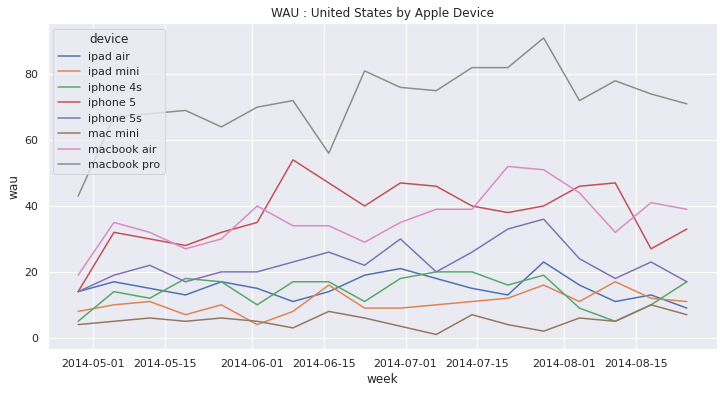

In [86]:
sns.lineplot(data = cnt_wau_apple, x = 'week', y = 'wau', hue = 'device')
plt.title('WAU : United States by Apple Device')
plt.show()

## NRU 일자 구하기 

In [95]:
df[['event_type','event_name']].value_counts().reset_index().sort_values(['event_type'])

,event_type,event_name,0
0,engagement,home_page,94065
18,engagement,search_click_result_7,709
17,engagement,search_click_result_9,784
16,engagement,search_click_result_6,805
15,engagement,search_click_result_5,968
14,engagement,search_click_result_3,1134
13,engagement,search_click_result_4,1264
12,engagement,search_click_result_1,1413
11,engagement,search_click_result_2,1499
19,engagement,search_click_result_8,690


In [99]:
list_nru = df[df['event_name'].isin(['create_user', 'complete_signup'])][['user_id','event_name','date','week','location','maker','device']]
list_nru['event_name'] = list_nru['event_name'].apply(lambda x : np.where(x == 'create_user', 'nru_1', 'nru_2'))
list_nru.head()

,user_id,event_name,date,week,location,maker,device
391,11768.0,nru_1,2014-05-01,2014-04-28,France,apple,macbook pro
394,11768.0,nru_2,2014-05-01,2014-04-28,France,apple,macbook pro
401,11769.0,nru_1,2014-05-01,2014-04-28,United Kingdom,lenovo,lenovo thinkpad
402,11770.0,nru_1,2014-05-01,2014-04-28,Japan,apple,iphone 5s
405,11770.0,nru_2,2014-05-01,2014-04-28,Japan,apple,iphone 5s


In [113]:
cnt_login_flow = list_nru[(list_nru['location'] == 'United States') & (df['maker'] == 'apple')].groupby(['week','event_name', 'device'])['user_id'].count().reset_index(name = 'cnt')
cnt_login_flow['ratio'] = cnt_login_flow.groupby(['week','device'])['cnt'].apply(lambda x : round(x/max(x)*100,2))
cnt_login_flow = cnt_login_flow[cnt_login_flow['event_name'] == 'nru_2']
cnt_login_flow.head()

<ipython-input-113-1da74516f466>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,week,event_name,device,cnt,ratio
8,2014-04-28,nru_2,ipad air,1,50.0
9,2014-04-28,nru_2,ipad mini,2,100.0
10,2014-04-28,nru_2,iphone 4s,1,25.0
11,2014-04-28,nru_2,iphone 5,3,75.0
12,2014-04-28,nru_2,iphone 5s,1,25.0


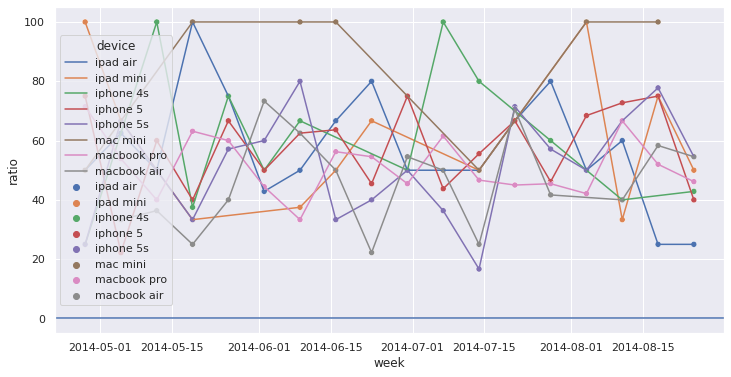

In [117]:
sns.lineplot(data = cnt_login_flow, x = 'week', y = 'ratio', hue = 'device')
sns.scatterplot(data = cnt_login_flow, x = 'week', y = 'ratio', hue = 'device')
plt.axhline(y = 0)
plt.show()

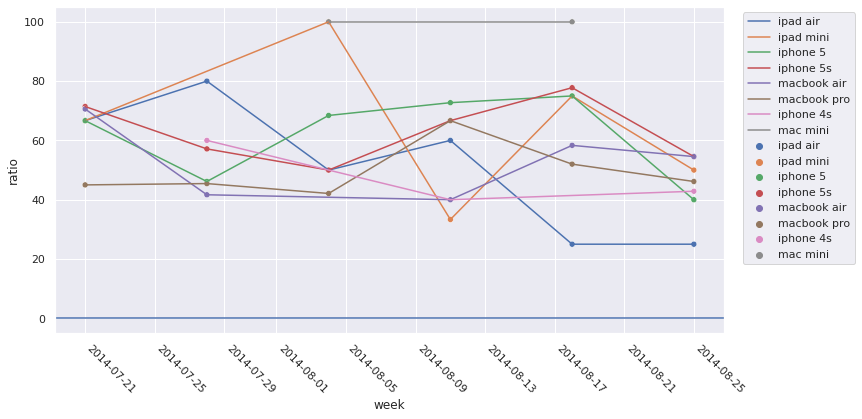

In [121]:
sns.lineplot(data = cnt_login_flow[cnt_login_flow['week'] >= '2014-07-15'], x = 'week', y = 'ratio', hue = 'device')
sns.scatterplot(data = cnt_login_flow[cnt_login_flow['week'] >= '2014-07-15'], x = 'week', y = 'ratio', hue = 'device')
plt.axhline(y = 0)
plt.legend().set_bbox_to_anchor((1.02, 1))
plt.xticks(rotation = -45, ha = 'left')
plt.show()

# Iteratros

In [122]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [123]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [124]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}